![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [156]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta

import re

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [157]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [158]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [159]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [160]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [161]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [162]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [163]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [164]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [165]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [166]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [168]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
27726,id_3118,Berlin,['Italian'],3120.0,$$ - $$$,25.0,"[['Reasonable price for Italian food', 'Love i...",/Restaurant_Review-g187323-d3491870-Reviews-Il...,d3491870,1,4.0
34847,id_7593,Paris,NaN,7594.0,NaN,10.0,"[[], []]",/Restaurant_Review-g187147-d9769893-Reviews-Ba...,d9769893,1,4.5
21312,id_333,Geneva,['Cafe'],335.0,$$ - $$$,10.0,"[['Cute coffeshop/pâtisserie!', 'Excellent pla...",/Restaurant_Review-g188057-d12345579-Reviews-C...,d12345579,1,4.5
35751,id_1493,Rome,"['Italian', 'Seafood', 'Mediterranean', 'Soups...",1494.0,$$ - $$$,321.0,"[['Lovely quiet restaurant', 'Good wine list t...",/Restaurant_Review-g187791-d1603592-Reviews-Ri...,d1603592,1,4.0
27962,id_2071,Berlin,NaN,2073.0,NaN,15.0,"[['Veggie döner deluxe', 'Delicious!'], ['04/1...",/Restaurant_Review-g187323-d5821030-Reviews-Ce...,d5821030,1,4.5


In [169]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

### Обработка признаков

In [170]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

In [171]:
data.drop(['Restaurant_id','URL_TA','ID_TA'],axis=1,inplace=True)

In [172]:
# функция для поиска выбросов через метод межквартильного расстояния
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

## **City**

In [173]:
data.City.nunique(dropna=False)

31

In [174]:
restaurants_in_cities = data.City.value_counts()
restaurants_in_cities

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

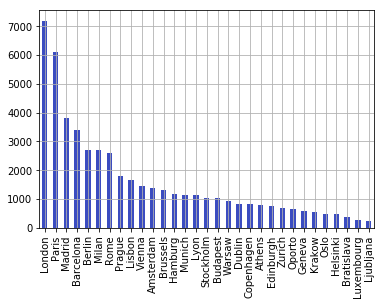

In [175]:
restaurants_in_cities.plot(kind='bar', grid=True, colormap='coolwarm')

In [176]:
# создадим новый признак 'number_of_nestaurants' - количество ресторанов в городе
rests = {}
for i in range(len(restaurants_in_cities)):
    rests[restaurants_in_cities.index[i]] = restaurants_in_cities[i]     
data['number_of_restaurants'] = data['City'].apply(lambda x:rests[x])
data.head()

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,number_of_restaurants
0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",0,0.0,6108
1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475
2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745
3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193
4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380


In [177]:
#Введем новый признак 'population_of_city' - население города, в тыс.чел.
#данные о населении городов взяты с https://ru.wikipedia.org/

population_of_city = {'Lyon': 516.092, 'Milan': 1399.860, 'Stockholm': 975.550, 
                       'Dublin': 1173.179, 'Madrid': 3334.730, 'Brussels': 1212.352,
                       'Lisbon': 506.654, 'Bratislava': 437.725, 'Oporto': 237.591,
                       'Zurich': 428.737, 'Edinburgh': 488.100, 'Oslo': 697.010,
                       'Copenhagen': 794.023, 'Vienna': 1921.153, 'Rome': 2790.712,
                       'Amsterdam':872.757 , 'Paris': 2148.327,'Athens': 655.780,
                       'Budapest': 1750.216, 'Krakow': 779.115, 'London': 8961.989,
                       'Warsaw': 1793.579,'Ljubljana': 284.355, 'Munich': 1488.202,
                       'Geneva': 200.548, 'Barcelona': 1664.182,'Helsinki': 656.250,
                       'Luxembourg': 124.509, 'Berlin': 3669.491, 'Prague': 1335.084, 
                       'Hamburg': 1845.229}

data['population_of_city'] = data.City.apply(lambda x:population_of_city[x])
data.head()

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city
0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",0,0.0,6108,2148.327
1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250
2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100
3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989
4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725


In [178]:
#введем еще 1 признак 'number_of_restaurants_per_capita' - количество ресторанов на тысячу человек
data['number_of_restaurants_per_capita'] = data['number_of_restaurants'] / data['population_of_city']
data.head()

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,number_of_restaurants_per_capita
0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",0,0.0,6108,2148.327,2.843143
1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,0.723810
2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,1.526327
3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,0.802612
4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,0.868125


1.4591931853683244


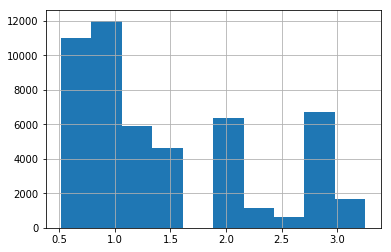

In [179]:
data['number_of_restaurants_per_capita'].hist()
print(data['number_of_restaurants_per_capita'].mean())

In [180]:
# проверим данные на выбросы - выбросов нет
outliers_iqr(data['number_of_restaurants_per_capita'])

array([], dtype=int64)

## **Cuisine Style**

In [181]:
data['Cuisine Style']

0                                           ['Bar', 'Pub']
1        ['European', 'Scandinavian', 'Gluten Free Opti...
2                                  ['Vegetarian Friendly']
3        ['Italian', 'Mediterranean', 'European', 'Vege...
4        ['Italian', 'Mediterranean', 'European', 'Seaf...
                               ...                        
49995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
49996    ['French', 'American', 'Bar', 'European', 'Veg...
49997                                ['Japanese', 'Sushi']
49998    ['Polish', 'European', 'Eastern European', 'Ce...
49999                                          ['Spanish']
Name: Cuisine Style, Length: 50000, dtype: object

In [182]:
#временно заполним пропуски единицей
data['Cuisine Style'] = data['Cuisine Style'].fillna(1)

#напишем функцию для приведения данных в столбце в список
def clear_elem(elem):
    start = elem.find('[') + 1
    stop = elem.find(']')
    elem = elem[start:stop]
    result = elem.split(',')
    new_result = []
    for el in result:
        new_el = ''
        for j in el:
            if j.isalpha():
                new_el += j
        new_result.append(new_el)
    return new_result

#применим функцию к столбцу Cuisine Style
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x:1 if x==1 else clear_elem(x))
data['Cuisine Style']

0                                               [Bar, Pub]
1        [European, Scandinavian, GlutenFreeOptions, Ve...
2                                     [VegetarianFriendly]
3        [Italian, Mediterranean, European, VegetarianF...
4        [Italian, Mediterranean, European, Seafood, Ve...
                               ...                        
49995    [Italian, VegetarianFriendly, VeganOptions, Gl...
49996    [French, American, Bar, European, VegetarianFr...
49997                                    [Japanese, Sushi]
49998    [Polish, European, EasternEuropean, CentralEur...
49999                                            [Spanish]
Name: Cuisine Style, Length: 50000, dtype: object

In [183]:
#разбиваем списки с типами кухонь на отдельные строки, чтобы вычислить самую популярную кухню в каждом городе
df_explode = data.explode('Cuisine Style')

#в словаре popular_cuisine содержатся данные о самой популярной кухне в каждом городе
popular_cuisine = {}
cities = set(data['City'].values)
for city in cities:
    result = df_explode[df_explode['City'] == city]['Cuisine Style'].value_counts().index[0]
    if result == 1: #если самое популярное значение для кухни оказывается 1(то есть пропуск), берем следующую по популярности кухню
        result = df_explode[df_explode['City'] == city]['Cuisine Style'].value_counts().index[1]
    popular_cuisine[city] = [result]
popular_cuisine

{'Berlin': ['VegetarianFriendly'],
 'Amsterdam': ['European'],
 'Rome': ['Italian'],
 'Helsinki': ['European'],
 'Athens': ['Greek'],
 'Brussels': ['European'],
 'Edinburgh': ['VegetarianFriendly'],
 'Budapest': ['European'],
 'Oslo': ['European'],
 'Dublin': ['VegetarianFriendly'],
 'Krakow': ['European'],
 'Munich': ['VegetarianFriendly'],
 'Stockholm': ['European'],
 'Warsaw': ['European'],
 'Luxembourg': ['European'],
 'Madrid': ['Spanish'],
 'Paris': ['French'],
 'Copenhagen': ['European'],
 'Ljubljana': ['European'],
 'Milan': ['Italian'],
 'Barcelona': ['Spanish'],
 'Lyon': ['French'],
 'Prague': ['European'],
 'Vienna': ['European'],
 'Lisbon': ['European'],
 'London': ['VegetarianFriendly'],
 'Hamburg': ['VegetarianFriendly'],
 'Zurich': ['European'],
 'Oporto': ['Portuguese'],
 'Bratislava': ['European'],
 'Geneva': ['European']}

In [184]:
#заменяем единицы (пропуски) на значения популярных кухонь для каждого города
for i in data.index:
    if data['Cuisine Style'].iloc[i] == 1:
        data['Cuisine Style'].iloc[i] = popular_cuisine[data['City'].iloc[i]]
data.head()

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,number_of_restaurants_per_capita
0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",0,0.0,6108,2148.327,2.843143
1,Helsinki,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,0.723810
2,Edinburgh,[VegetarianFriendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,1.526327
3,London,"[Italian, Mediterranean, European, VegetarianF...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,0.802612
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,0.868125


In [185]:
#создадим новый столбец is_popular_cuisine с признаком, который показывает представлена ли в данном ресторане
#самая популярная в городе кухня: 1 - если представлена, 0 - если нет

def pop_cuisine(i):
    key = data.City[i]
    if popular_cuisine[key][0] in data['Cuisine Style'][i]:
        return 1
    else:
        return 0

data['is_popular_cuisine'] = 0
for i in range(len(data)):
    data['is_popular_cuisine'][i] = pop_cuisine(i)
data.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,number_of_restaurants_per_capita,is_popular_cuisine
0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",0,0.0,6108,2148.327,2.843143,0
1,Helsinki,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,0.723810,1
2,Edinburgh,[VegetarianFriendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,1.526327,1
3,London,"[Italian, Mediterranean, European, VegetarianF...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,0.802612,1
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,0.868125,1


In [186]:
# введем новый признак number_of_cuisines - количество кухонь, представленных в ресторане
def count_cuisines(x):
    if type(x)==list:
        return len(x)
    return 1

data['number_of_cuisines'] = data['Cuisine Style'].apply(lambda x:count_cuisines(x))

data.head()

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,number_of_restaurants_per_capita,is_popular_cuisine,number_of_cuisines
0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",0,0.0,6108,2148.327,2.843143,0,2
1,Helsinki,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,0.723810,1,5
2,Edinburgh,[VegetarianFriendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,1.526327,1,1
3,London,"[Italian, Mediterranean, European, VegetarianF...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,0.802612,1,5
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,0.868125,1,6


1     20744
2      7794
3      6638
4      5948
5      4482
6      2611
7      1294
8       363
9        93
10       26
11        4
21        1
15        1
13        1
Name: number_of_cuisines, dtype: int64


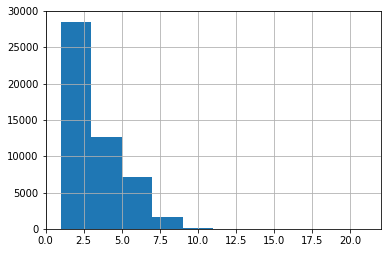

In [187]:
data['number_of_cuisines'].hist()
print(data['number_of_cuisines'].value_counts())

In [188]:
# функция поиска выбросов нашла большое количество выбросов в данных
#пока ничего с ними не буду делать, затем, возможно, необходимо будет заменить эти значения на среднее количество кухонь
outliers_iqr(data['number_of_cuisines'])

array([  679,   832,  1358,  2292,  3184,  3377,  3647,  3947,  4323,
        4343,  5510,  5580,  5719,  5721,  6348,  6864,  7106,  7178,
        7182,  7260,  7547,  8261,  8388,  8676,  9633,  9647, 10945,
       11296, 11326, 11581, 11597, 12172, 12493, 12622, 12647, 12752,
       14461, 14790, 15233, 15544, 15642, 16013, 16905, 17104, 19073,
       19154, 19228, 19323, 19427, 19645, 19766, 20954, 21577, 21940,
       21970, 22215, 22667, 22673, 23092, 24080, 24313, 25183, 25754,
       25770, 25832, 26037, 26519, 26618, 26734, 27577, 27656, 28460,
       28550, 28655, 28820, 29396, 29516, 30089, 30303, 30452, 30880,
       31338, 31860, 32161, 32188, 32268, 32718, 33015, 33239, 33505,
       34480, 34584, 35316, 35385, 35843, 36651, 36765, 37816, 37846,
       38543, 38942, 40110, 40208, 40268, 40575, 41543, 41873, 42023,
       42420, 42925, 43207, 44562, 45234, 45568, 45655, 45975, 46394,
       46952, 47189, 47303, 47330, 48241, 49276, 49413, 49614, 49955])

In [189]:
#разделим все кухни, представленные в датасете на несколько более общих категорий,
#чтобы удобно было представить этот признак в виде dummy-переменных

cuisines_types = {'Vegan':['VegetarianFriendly', 'VeganOptions', 'GlutenFreeOptions','Healthy'],
                  'European':['European', 'Slovenian','Latvian','CentralEuropean', 'British','German','Swiss','Austrian','Hungarian','Irish','Scottish','Polish','Czech','EasternEuropean','Welsh'],
                 'Mediterranean':['Italian','Pizza', 'Mediterranean','French', 'Belgian','Spanish','Portuguese','Albanian','Romanian','Croatian','Greek', 'Turkish'],
                 'Asian':['Mongolian','Asian','Tibetan','Cambodian','Singaporean','SriLankan','Taiwanese','MinorityChinese','Indonesian','Japanese','Chinese','Indian','Thai','Malaysian','Korean','Vietnamese','CentralAsian','Filipino','Sushi','Balti','Fujian','Yunnan','Burmese'],
                 'Eastern':['Afghani','Pakistani','Israeli','Nepali', 'Bangladeshi','Arabic','Halal','Lebanese','MiddleEastern','Persian','Kosher','Xinjiang'],
                 'North American':['American','Canadian', 'Mexican','CentralAmerican','NativeAmerican','Southwestern','Contemporary', 'CajunCreole'],
                 'South American':['SouthAmerican','Latin','Argentinean','Hawaiian','Brazilian','Peruvian', 'Caribbean','Cuban','Colombian','Chilean','Ecuadorean','Salvadoran','Jamaican', 'Polynesian','Venezuelan'],
                 'Scandinavian':['Scandinavian','Dutch', 'Danish', 'Swedish','Norwegian'],
                 'African':['African','Moroccan','Ethiopian','Tunisian','Egyptian'],
                 'Russian':['Russian','Ukrainian'],
                 'Australian':['Australian','NewZealand'],
                 'Caucasian':['Armenian','Georgian','Caucasian','Uzbek','Azerbaijani'],
                 'Alcohol':['Pub','Bar','WineBar','BrewPub'],
                 'Other':['International', 'Fusion', 'Soups','Gastropub', 'Delicatessen','Diner','StreetFood','FastFood','Cafe','Seafood'],
                 'Meat':['Grill','Barbecue','Steakhouse']}


def rank_cuisines(lst):
    result = set()
    for elem in lst:
        for key, value in cuisines_types.items():
            if elem in value:
                result.add(key)
                break
    return list(result)

cuisine_style_copy = data['Cuisine Style'].copy()
cuisine_style_copy = cuisine_style_copy.apply(lambda x:rank_cuisines(x))
cuisine_style_copy

0                                                [Alcohol]
1                          [Vegan, European, Scandinavian]
2                                                  [Vegan]
3                         [Vegan, European, Mediterranean]
4                  [Vegan, Other, European, Mediterranean]
                               ...                        
49995                               [Vegan, Mediterranean]
49996    [European, Mediterranean, North American, Alco...
49997                                              [Asian]
49998                                    [European, Vegan]
49999                                      [Mediterranean]
Name: Cuisine Style, Length: 50000, dtype: object

In [190]:
#после замены типов кухонь на категории из словаря cuisines_types,
#выразим признак Cuisine Style через dummy_переменные

cuisine_data = pd.get_dummies(cuisine_style_copy.explode(),prefix='cuis').sum(level=0)
data = pd.concat([data,cuisine_data],axis=1)
data.head()

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,...,cuis_Eastern,cuis_European,cuis_Meat,cuis_Mediterranean,cuis_North American,cuis_Other,cuis_Russian,cuis_Scandinavian,cuis_South American,cuis_Vegan
0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",0,0.0,6108,2148.327,...,0,0,0,0,0,0,0,0,0,0
1,Helsinki,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,...,0,1,0,0,0,0,0,1,0,1
2,Edinburgh,[VegetarianFriendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,...,0,0,0,0,0,0,0,0,0,1
3,London,"[Italian, Mediterranean, European, VegetarianF...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,...,0,1,0,1,0,0,0,0,0,1
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,...,0,1,0,1,0,1,0,0,0,1


In [191]:
#cоздадим новый столбец - VegOrNot - который показывает, подходит ли кухня в ресторане вегетарианцам:
#1 - если подходит, 0 - если нет

def for_vegan(x):
    pattern = re.compile('Veg')
    result = pattern.findall(str(x))
    if len(result) > 0:
        return 1
    else:
        return 0
data['VegOrNot'] = data['Cuisine Style'].apply(lambda x:for_vegan(x))
data.head()

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,...,cuis_European,cuis_Meat,cuis_Mediterranean,cuis_North American,cuis_Other,cuis_Russian,cuis_Scandinavian,cuis_South American,cuis_Vegan,VegOrNot
0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",0,0.0,6108,2148.327,...,0,0,0,0,0,0,0,0,0,0
1,Helsinki,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,...,1,0,0,0,0,0,1,0,1,1
2,Edinburgh,[VegetarianFriendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,...,0,0,0,0,0,0,0,0,1,1
3,London,"[Italian, Mediterranean, European, VegetarianF...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,...,1,0,1,0,0,0,0,0,1,1
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,...,1,0,1,0,1,0,0,0,1,1


In [192]:
data['VegOrNot'].value_counts()

0    32657
1    17343
Name: VegOrNot, dtype: int64

In [193]:
#добaвим новый признак - количество кухонь, представленных в ресторанах каждого города
df_explode = data.explode('Cuisine Style')

    #в словаре city_cuis число кухонь в городе
city_cuis = {}
cities = set(data['City'].values)
for city in cities:
    result = df_explode[df_explode['City'] == city]['Cuisine Style'].nunique()
    city_cuis[city] = result
        
data['number_cuisines_city'] = data['City'].apply(lambda x:city_cuis[x])

## **Ranking**

In [194]:
#для создания нового признака разделим место ресторана среди ресторанов города на общее количество ресторанов в городе
data['ranking/number_of_restaurants'] = data['Ranking'] / data['number_of_restaurants']
data.head()

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,...,cuis_Mediterranean,cuis_North American,cuis_Other,cuis_Russian,cuis_Scandinavian,cuis_South American,cuis_Vegan,VegOrNot,number_cuisines_city,ranking/number_of_restaurants
0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",0,0.0,6108,2148.327,...,0,0,0,0,0,0,0,0,102,2.122299
1,Helsinki,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,...,0,0,0,0,1,0,1,1,71,0.223158
2,Edinburgh,[VegetarianFriendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,...,0,0,0,0,0,0,1,1,66,1.087248
3,London,"[Italian, Mediterranean, European, VegetarianF...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,...,1,0,0,0,0,0,1,1,110,0.232031
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,...,1,0,1,0,0,0,1,1,59,0.097368


## **Price Range**

In [195]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [196]:
data['Price Range'].isna().sum()

17361

In [197]:
# Применим get_dummies к признаку Price Range, предварительно заменив пропуски
#самым популярным значением, то есть '$$ - $$$'

data['Price Range'] = data['Price Range'].fillna('$$ - $$$')
data = pd.get_dummies(data, columns=[ 'Price Range',])
data.rename(columns={'Price Range_$': 'Price Range_1', 'Price Range_$$ - $$$': 'Price Range_2', 'Price Range_$$$$': 'Price Range_3'}, inplace=True)
data.head()

,City,Cuisine Style,Ranking,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,number_of_restaurants_per_capita,...,cuis_Russian,cuis_Scandinavian,cuis_South American,cuis_Vegan,VegOrNot,number_cuisines_city,ranking/number_of_restaurants,Price Range_1,Price Range_2,Price Range_3
0,Paris,"[Bar, Pub]",12963.0,4.0,"[[], []]",0,0.0,6108,2148.327,2.843143,...,0,0,0,0,0,102,2.122299,0,1,0
1,Helsinki,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,0.723810,...,0,1,0,1,1,71,0.223158,0,1,0
2,Edinburgh,[VegetarianFriendly],810.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,1.526327,...,0,0,0,1,1,66,1.087248,0,1,0
3,London,"[Italian, Mediterranean, European, VegetarianF...",1669.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,0.802612,...,0,0,0,1,1,110,0.232031,0,0,1
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,0.868125,...,0,0,0,1,1,59,0.097368,0,0,1


## **Number of Reviews**

In [198]:
data['Number of Reviews'].isna().sum()

3200

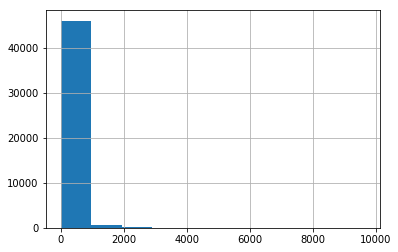

In [199]:
data['Number of Reviews'].hist()

In [200]:
#функция поиска выбросов не нашла выбросов в этом столбце

outliers_iqr(data['Number of Reviews'])

array([], dtype=int64)

In [201]:
#заполним пропуски в столбце number_of_reviews средним количеcтвом отзывов
mean_number_of_reviews = data['Number of Reviews'].mean()
data['Number of Reviews'].fillna(round(mean_number_of_reviews),inplace=True)

## **Reviews**

In [202]:
data['Reviews'][1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [203]:
#Выделим из столбца Reviews по шаблону даты c помощью регулярных выражений
pattern = re.compile('\d{2}\/\d{2}\/\d{4}')
data['reviews_date'] = data['Reviews'].apply(lambda x:pattern.findall(str(x)))
data.head()

,City,Cuisine Style,Ranking,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,number_of_restaurants_per_capita,...,cuis_Scandinavian,cuis_South American,cuis_Vegan,VegOrNot,number_cuisines_city,ranking/number_of_restaurants,Price Range_1,Price Range_2,Price Range_3,reviews_date
0,Paris,"[Bar, Pub]",12963.0,4.0,"[[], []]",0,0.0,6108,2148.327,2.843143,...,0,0,0,0,102,2.122299,0,1,0,[]
1,Helsinki,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,0.723810,...,1,0,1,1,71,0.223158,0,1,0,"[12/05/2017, 10/29/2017]"
2,Edinburgh,[VegetarianFriendly],810.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,1.526327,...,0,0,1,1,66,1.087248,0,1,0,"[12/28/2017, 12/06/2017]"
3,London,"[Italian, Mediterranean, European, VegetarianF...",1669.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,0.802612,...,0,0,1,1,110,0.232031,0,0,1,"[12/06/2017, 11/22/2017]"
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,0.868125,...,0,0,1,1,59,0.097368,0,0,1,"[02/08/2018, 01/24/2018]"


In [204]:
#выделим в отдельный столбец reviews_date_1 дату последнего отзыва
data['reviews_date_1'] = data.reviews_date.apply(lambda x:0 if len(x)==0 else x[0])
data.head()

,City,Cuisine Style,Ranking,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,number_of_restaurants_per_capita,...,cuis_South American,cuis_Vegan,VegOrNot,number_cuisines_city,ranking/number_of_restaurants,Price Range_1,Price Range_2,Price Range_3,reviews_date,reviews_date_1
0,Paris,"[Bar, Pub]",12963.0,4.0,"[[], []]",0,0.0,6108,2148.327,2.843143,...,0,0,0,102,2.122299,0,1,0,[],0
1,Helsinki,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,0.723810,...,0,1,1,71,0.223158,0,1,0,"[12/05/2017, 10/29/2017]",12/05/2017
2,Edinburgh,[VegetarianFriendly],810.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,1.526327,...,0,1,1,66,1.087248,0,1,0,"[12/28/2017, 12/06/2017]",12/28/2017
3,London,"[Italian, Mediterranean, European, VegetarianF...",1669.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,0.802612,...,0,1,1,110,0.232031,0,0,1,"[12/06/2017, 11/22/2017]",12/06/2017
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,0.868125,...,0,1,1,59,0.097368,0,0,1,"[02/08/2018, 01/24/2018]",02/08/2018


In [205]:
#выделим в отдельный столбец reviews_date_2 дату предпоследнего отзыва
def review_date_2(x):
    if len(x) == 2:
        return x[1]
    elif len(x) == 1:
        return x[0]
    else:
        return 0
data['reviews_date_2'] =  data.reviews_date.apply(lambda x:review_date_2(x))
data.head()

,City,Cuisine Style,Ranking,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,number_of_restaurants_per_capita,...,cuis_Vegan,VegOrNot,number_cuisines_city,ranking/number_of_restaurants,Price Range_1,Price Range_2,Price Range_3,reviews_date,reviews_date_1,reviews_date_2
0,Paris,"[Bar, Pub]",12963.0,4.0,"[[], []]",0,0.0,6108,2148.327,2.843143,...,0,0,102,2.122299,0,1,0,[],0,0
1,Helsinki,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,0.723810,...,1,1,71,0.223158,0,1,0,"[12/05/2017, 10/29/2017]",12/05/2017,10/29/2017
2,Edinburgh,[VegetarianFriendly],810.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,1.526327,...,1,1,66,1.087248,0,1,0,"[12/28/2017, 12/06/2017]",12/28/2017,12/06/2017
3,London,"[Italian, Mediterranean, European, VegetarianF...",1669.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,0.802612,...,1,1,110,0.232031,0,0,1,"[12/06/2017, 11/22/2017]",12/06/2017,11/22/2017
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,0.868125,...,1,1,59,0.097368,0,0,1,"[02/08/2018, 01/24/2018]",02/08/2018,01/24/2018


In [206]:
#приведем все даты к формату datetime

data['reviews_date_2'] = data['reviews_date_2'].apply(lambda x:0 if x==0 else datetime.strptime(str(x), '%m/%d/%Y'))
data['reviews_date_1'] = data['reviews_date_1'].apply(lambda x:0 if x==0 else datetime.strptime(str(x), '%m/%d/%Y'))

In [207]:
#добавим новый столбец between_reviews, который показывает сколько дней прошло между последним и предпоследним отзывом
data['between_reviews'] = data['reviews_date_1'] - data['reviews_date_2']

data.between_reviews = data.between_reviews.apply(lambda x:0 if x==0 else x.days)
data.head()

,City,Cuisine Style,Ranking,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,number_of_restaurants_per_capita,...,VegOrNot,number_cuisines_city,ranking/number_of_restaurants,Price Range_1,Price Range_2,Price Range_3,reviews_date,reviews_date_1,reviews_date_2,between_reviews
0,Paris,"[Bar, Pub]",12963.0,4.0,"[[], []]",0,0.0,6108,2148.327,2.843143,...,0,102,2.122299,0,1,0,[],0,0,0
1,Helsinki,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,0.723810,...,1,71,0.223158,0,1,0,"[12/05/2017, 10/29/2017]",2017-12-05 00:00:00,2017-10-29 00:00:00,37
2,Edinburgh,[VegetarianFriendly],810.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,1.526327,...,1,66,1.087248,0,1,0,"[12/28/2017, 12/06/2017]",2017-12-28 00:00:00,2017-12-06 00:00:00,22
3,London,"[Italian, Mediterranean, European, VegetarianF...",1669.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,0.802612,...,1,110,0.232031,0,0,1,"[12/06/2017, 11/22/2017]",2017-12-06 00:00:00,2017-11-22 00:00:00,14
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,0.868125,...,1,59,0.097368,0,0,1,"[02/08/2018, 01/24/2018]",2018-02-08 00:00:00,2018-01-24 00:00:00,15


In [208]:
#добавим новый столбец last_review, который показывает сколько прошло времени с даты последнего отзыва
def last_review_date(x):
    now = datetime.now()
    if x!= 0:
        result = now - x
        return result.days
    return 0

data['last_review'] = data['reviews_date_1'].apply(lambda x:last_review_date(x))
data.head()

,City,Cuisine Style,Ranking,Number of Reviews,Reviews,sample,Rating,number_of_restaurants,population_of_city,number_of_restaurants_per_capita,...,number_cuisines_city,ranking/number_of_restaurants,Price Range_1,Price Range_2,Price Range_3,reviews_date,reviews_date_1,reviews_date_2,between_reviews,last_review
0,Paris,"[Bar, Pub]",12963.0,4.0,"[[], []]",0,0.0,6108,2148.327,2.843143,...,102,2.122299,0,1,0,[],0,0,0,0
1,Helsinki,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,475,656.250,0.723810,...,71,0.223158,0,1,0,"[12/05/2017, 10/29/2017]",2017-12-05 00:00:00,2017-10-29 00:00:00,37,1347
2,Edinburgh,[VegetarianFriendly],810.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,745,488.100,1.526327,...,66,1.087248,0,1,0,"[12/28/2017, 12/06/2017]",2017-12-28 00:00:00,2017-12-06 00:00:00,22,1324
3,London,"[Italian, Mediterranean, European, VegetarianF...",1669.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,7193,8961.989,0.802612,...,110,0.232031,0,0,1,"[12/06/2017, 11/22/2017]",2017-12-06 00:00:00,2017-11-22 00:00:00,14,1346
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,380,437.725,0.868125,...,59,0.097368,0,0,1,"[02/08/2018, 01/24/2018]",2018-02-08 00:00:00,2018-01-24 00:00:00,15,1282


In [209]:
#добавим новый признак weekday, который показывает в какой день недели был оставлен последний отзыв
def week_day(x):
        try:
            y = x.weekday()
            return y
        except:
            return x
    
data['weekday'] = data['reviews_date_1'].apply(lambda x:week_day(x))

In [210]:
#добавим новый признак 'reviews/population' который показывает среднее число отзывов на тысячу человек
data['reviews/population'] = data['Number of Reviews'] / data['population_of_city']

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

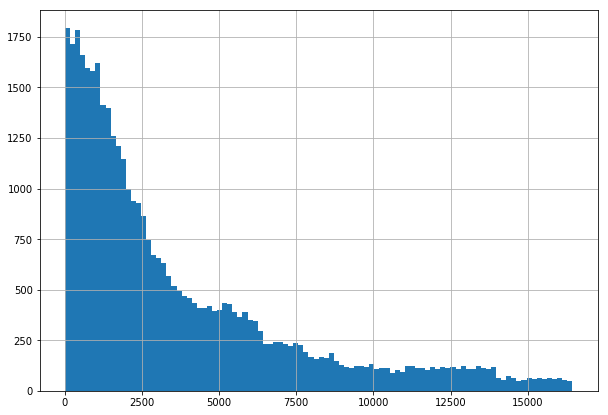

In [211]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

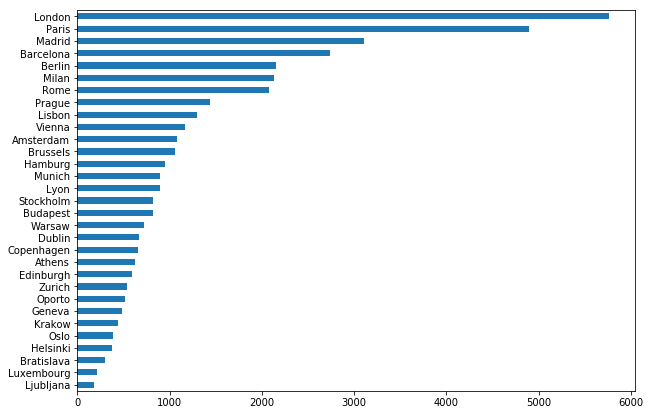

In [212]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

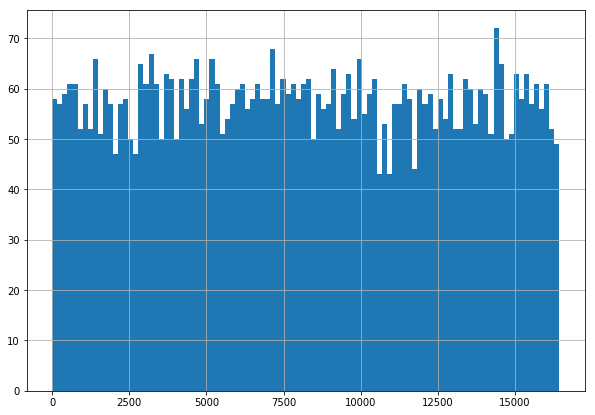

In [213]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

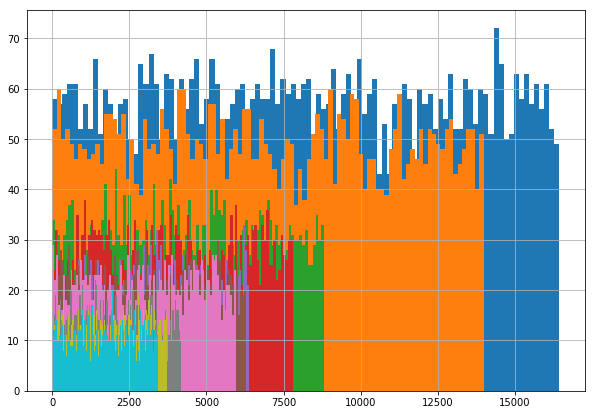

In [214]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

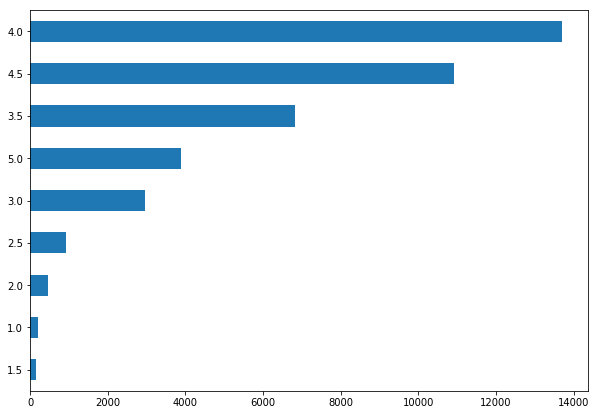

In [215]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

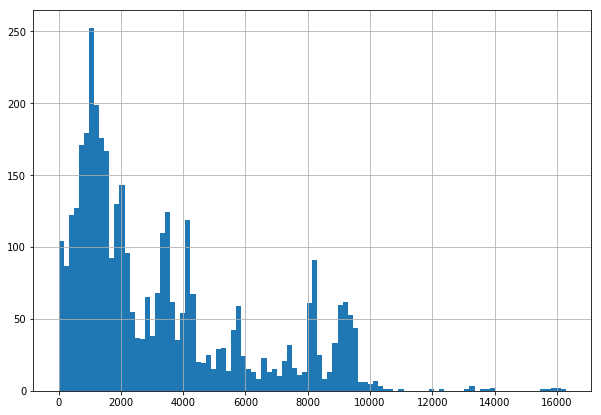

In [216]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

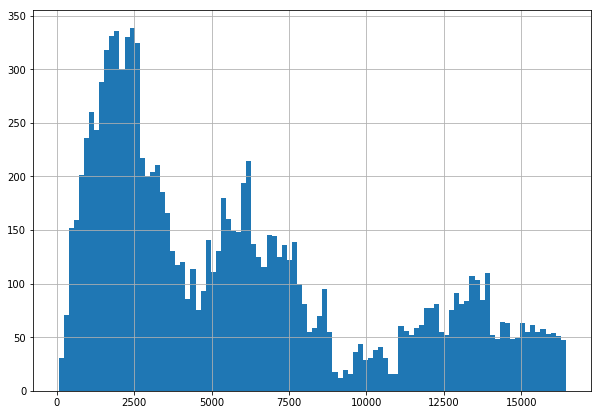

In [217]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

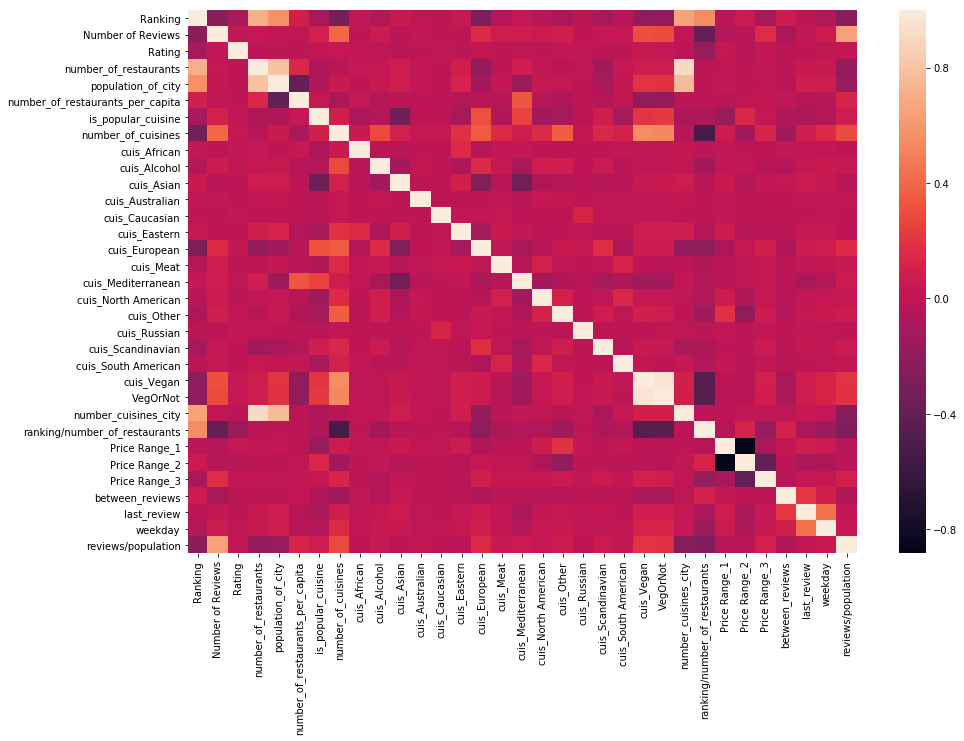

In [218]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [219]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [227]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''

    df = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    df.drop(['Restaurant_id','ID_TA','URL_TA'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    mean_number_of_reviews = df['Number of Reviews'].mean()
    df['Number of Reviews'].fillna(round(mean_number_of_reviews),inplace=True)
    

    # тут ваш код не генерацию новых фитчей
    
    #CITY
    restaurants_in_cities = data.City.value_counts()
    rests = {}
    for i in range(len(restaurants_in_cities)):
        rests[restaurants_in_cities.index[i]] = restaurants_in_cities[i]  
    df['number_of_restaurants'] = df['City'].apply(lambda x:rests[x])
    
    population_of_city = {'Lyon': 516.092, 'Milan': 1399.860, 'Stockholm': 975.550, 
                       'Dublin': 1173.179, 'Madrid': 3334.730, 'Brussels': 1212.352,
                       'Lisbon': 506.654, 'Bratislava': 437.725, 'Oporto': 237.591,
                       'Zurich': 428.737, 'Edinburgh': 488.100, 'Oslo': 697.010,
                       'Copenhagen': 794.023, 'Vienna': 1921.153, 'Rome': 2790.712,
                       'Amsterdam':872.757 , 'Paris': 2148.327,'Athens': 655.780,
                       'Budapest': 1750.216, 'Krakow': 779.115, 'London': 8961.989,
                       'Warsaw': 1793.579,'Ljubljana': 284.355, 'Munich': 1488.202,
                       'Geneva': 200.548, 'Barcelona': 1664.182,'Helsinki': 656.250,
                       'Luxembourg': 124.509, 'Berlin': 3669.491, 'Prague': 1335.084, 
                       'Hamburg': 1845.229}
    df['population_of_city'] = df.City.apply(lambda x:population_of_city[x])
    df['number_of_restaurants_per_capita'] = df['number_of_restaurants'] / df['population_of_city']
    
    #CUISINE STYLE
    
    df['Cuisine Style'] = df['Cuisine Style'].fillna(1)

    def clear_elem(elem):
        if elem !=1:
            start = elem.find('[') + 1
            stop = elem.find(']')
            elem = elem[start:stop]
            result = elem.split(',')
            new_result = []
            for el in result:
                new_el = ''
                for j in el:
                    if j.isalpha():
                        new_el += j
                new_result.append(new_el)
            return new_result
        return 1

    df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: clear_elem(x))
     
    df_explode = df.explode('Cuisine Style')
    popular_cuisine = {}
    cities = set(df['City'].values)
    for city in cities:
        result = df_explode[df_explode['City'] == city]['Cuisine Style'].value_counts().index[0]
        if result == 1:
             result = df_explode[df_explode['City'] == city]['Cuisine Style'].value_counts().index[1]
        popular_cuisine[city] = [result]

    for i in df.index:
         if df['Cuisine Style'].iloc[i] == 1:
            df['Cuisine Style'].iloc[i] = popular_cuisine[df['City'].iloc[i]]
                      
    def count_cuisines(x):
        if type(x)==list:
            return len(x)
        return 1

    df['number_of_cuisines'] = df['Cuisine Style'].apply(lambda x:count_cuisines(x))

    def is_pop_cuisine(i):
        key = df.City[i]
        if popular_cuisine[key][0] in df['Cuisine Style'][i]:
            return 1
        else:
            return 0

    df['popular_cuisine'] = 0
    for i in range(len(df)):
        df['popular_cuisine'][i] = is_pop_cuisine(i)
        
    def for_vegan(x):
        pattern = re.compile('Veg')
        result = pattern.findall(str(x))
        if len(result) > 0:
            return 1
        else:
            return 0
        
    df['VegOrNot'] = df['Cuisine Style'].apply(lambda x:for_vegan(x))
    
    cuisines_types = {'Vegan':['VegetarianFriendly', 'VeganOptions', 'GlutenFreeOptions','Healthy'],
                  'European':['Russian','European', 'Slovenian','CentralEuropean', 'British','German','Swiss','Austrian','Hungarian','Irish','Scottish','Polish','Czech','EasternEuropean','Welsh'],
                 'Mediterranean':['Italian','Pizza', 'Mediterranean','French', 'Belgian','Spanish','Portuguese','Albanian','Croatian','Greek', 'Turkish'],
                 'Asian':['Asian','Cambodian','SriLankan','MinorityChinese','Indonesian','Japanese','Chinese','Indian','Thai','Malaysian','Korean','Vietnamese','CentralAsian','Filipino','Sushi','Fujian'],
                 'Eastern':['Afghani','Pakistani','Israeli','Nepali', 'Bangladeshi','Arabic','Halal','Lebanese','MiddleEastern','Persian','Kosher'],
                 'North American':['American','Canadian', 'Mexican','NativeAmerican','Southwestern','Contemporary', 'CajunCreole'],
                 'South American':['SouthAmerican','Latin','Argentinean','Hawaiian','Brazilian','Peruvian', 'Caribbean','Cuban','Colombian','Chilean','Ecuadorean','Jamaican', 'Polynesian','Venezuelan'],
                 'Scandinavian':['Scandinavian','Dutch', 'Danish', 'Swedish'],
                 'African':['African','Moroccan','Tunisian','Egyptian'],
                 'Unique':['Ukrainian', 'Latvian','Romanian','Mongolian','Uzbek','Burmese','Xinjiang','CentralAmerican','Singaporean','Taiwanese','Yunnan', 'Norwegian', 'Salvadoran', 'Armenian','Tibetan','Ethiopian','Balti'],
                 'Australian':['Australian','NewZealand'],
                 'Caucasian':['Georgian','Caucasian','Azerbaijani'],
                 'Alcohol':['Pub','Bar','WineBar','BrewPub'],
                 'Other':['International', 'Fusion', 'Soups','Gastropub', 'Delicatessen','Diner','StreetFood','FastFood','Cafe','Seafood'],
                 'Meat':['Grill','Barbecue','Steakhouse']}
    
    def rank_cuisines(lst):
        result = set()
        for elem in lst:
            for key, value in cuisines_types.items():
                if elem in value:
                    result.add(key)
                    break
        return list(result)
    cuisine_style_copy = df['Cuisine Style'].copy()
    cuisine_style_copy = cuisine_style_copy.apply(lambda x:rank_cuisines(x))

    cuisine_data = pd.get_dummies(cuisine_style_copy.explode(),prefix='cuis').sum(level=0)
    df = pd.concat([df,cuisine_data],axis=1)
    
    df_explode = df.explode('Cuisine Style')
    city_cuis = {}
    cities = set(df['City'].values)
    for city in cities:
        result = df_explode[df_explode['City'] == city]['Cuisine Style'].nunique()
        city_cuis[city] = result
        
    df['number_cuisines_city'] = df['City'].apply(lambda x:city_cuis[x])
   
    #RANKING
    
    df['ranking/number_of_restaurants'] = df['Ranking'] / df['number_of_restaurants']
    
    #PRICE RANGE
    df['Price Range'] = df['Price Range'].fillna('$$ - $$$')
    df = pd.get_dummies(df, columns=['Price Range'])
    df.rename(columns={'Price Range_$$$$':'Price Range_3','Price Range_$$ - $$$':'Price Range_2', 'Price Range_$':'Price Range_1'},inplace=True)
    
    #REVIEWS
    pattern = re.compile('\d{2}\/\d{2}\/\d{4}')
    df['reviews_dates'] = df['Reviews'].apply(lambda x:pattern.findall(str(x)))
    
    df['reviews_date_1'] = df.reviews_dates.apply(lambda x:0 if len(x)==0 else x[0])

    def review_date_2(x):
        if len(x) == 2:
            return x[1]
        elif len(x) == 1:
            return x[0]
        else:
            return 0
    df['reviews_date_2'] =  df.reviews_dates.apply(lambda x:review_date_2(x))

    df['reviews_date_2'] = df['reviews_date_2'].apply(lambda x:0 if x==0 else datetime.strptime(str(x), '%m/%d/%Y'))
    df['reviews_date_1'] = df['reviews_date_1'].apply(lambda x:0 if x==0 else datetime.strptime(str(x), '%m/%d/%Y'))
    
    def week_day(x):
        try:
            y = x.weekday()
            return y
        except:
            return x
    
    df['weekday'] = df['reviews_date_1'].apply(lambda x:week_day(x))
    
    df['between_reviews'] = df['reviews_date_1'] - df['reviews_date_2']
    df['between_reviews'] = df.between_reviews.apply(lambda x:0 if x==0 else x.days)

    def last_review_date(x):
        now = datetime.now()
        if x!= 0:
            result = now - x
            return result.days
        return 0

    df['last_review'] = df['reviews_date_1'].apply(lambda x:last_review_date(x))
    
    df['reviews/population'] = df['Number of Reviews'] / df['population_of_city']
    
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df.columns if df[s].dtypes == 'object']
    df.drop(object_columns, axis = 1, inplace=True)
    
    return df

In [237]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


#### Запускаем и проверяем что получилось

In [238]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Ranking,Number of Reviews,sample,Rating,number_of_restaurants,population_of_city,number_of_restaurants_per_capita,number_of_cuisines,popular_cuisine,VegOrNot,...,cuis_Vegan,number_cuisines_city,ranking/number_of_restaurants,Price Range_1,Price Range_2,Price Range_3,weekday,between_reviews,last_review,reviews/population
43792,1284.0,104.0,1,3.0,1126,516.092,2.181782,1,0,0,...,0,73,1.140320,0,1,0,6,801,2245,0.201514
4567,138.0,714.0,0,0.0,1372,872.757,1.572030,7,1,1,...,1,85,0.100583,0,1,0,5,8,1322,0.818097
21057,2649.0,124.0,1,4.0,1443,1921.153,0.751111,1,1,0,...,0,89,1.835759,0,1,0,3,0,1716,0.064545
20102,3489.0,204.0,1,3.5,6108,2148.327,2.843143,4,0,1,...,1,102,0.571218,0,1,0,0,148,1313,0.094958
17326,2555.0,32.0,1,3.5,1816,1335.084,1.360214,2,1,0,...,0,82,1.406938,0,1,0,6,160,1391,0.023969
48644,9434.0,124.0,1,5.0,7193,8961.989,0.802612,3,0,0,...,0,110,1.311553,0,1,0,2,0,1325,0.013836
1276,60.0,746.0,0,0.0,3813,3334.730,1.143421,5,1,1,...,1,93,0.015736,1,0,0,0,4,1313,0.223706
29728,50.0,594.0,1,4.5,2589,2790.712,0.927720,6,1,1,...,1,80,0.019312,0,1,0,0,3,1313,0.212849
40255,1171.0,5.0,1,4.5,745,488.100,1.526327,4,1,1,...,1,66,1.571812,1,0,0,2,37,1542,0.010244
10379,1906.0,250.0,1,4.0,3395,1664.182,2.040041,4,1,0,...,1,95,0.561414,0,1,0,3,43,1520,0.150224


In [229]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
Ranking                             50000 non-null float64
Number of Reviews                   50000 non-null float64
sample                              50000 non-null int64
Rating                              50000 non-null float64
number_of_restaurants               50000 non-null int64
population_of_city                  50000 non-null float64
number_of_restaurants_per_capita    50000 non-null float64
number_of_cuisines                  50000 non-null int64
popular_cuisine                     50000 non-null int64
VegOrNot                            50000 non-null int64
cuis_African                        50000 non-null uint8
cuis_Alcohol                        50000 non-null uint8
cuis_Asian                          50000 non-null uint8
cuis_Australian                     50000 non-null uint8
cuis_Caucasian                      50000 non-null uint8
cuis_Eastern              

In [239]:
df_preproc.drop(['weekday'], axis=1,inplace=True)

In [240]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [241]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [242]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 32), (40000, 32), (40000, 31), (32000, 31), (8000, 31))

# Model 
Сам ML

In [243]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [244]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [245]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [246]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.204476875


In [ ]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')


# Submission
Если все устраевает - готовим Submission на кагл

In [ ]:
test_data.sample(10)

In [ ]:
test_data = test_data.drop(['Rating'], axis=1)

In [ ]:
sample_submission

In [ ]:
#округляем значения до 0.5
def round_of_rating(number):
    return np.round(number * 2) / 2
predict_submission = round_of_rating(model.predict(test_data))

In [ ]:
predict_submission

In [ ]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
